In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chemMap as cm

In [2]:
Diop = cm.loadtransect('Data/Linescans_HighResMapping/Linescans/Diopside/', ['Si', 'Ti', 'Al', 'Cr', 'Fe', 'Mn', 'Mg', 'Ca', 'Na', 'K'])
Aug = cm.loadtransect('Data/Linescans_HighResMapping/Linescans/CrAugite/', ['Si', 'Ti', 'Al', 'Cr', 'Fe', 'Mn', 'Mg', 'Ca', 'Na', 'K'])

In [3]:
Diop_pref = pd.DataFrame(columns = Diop.keys()[:-1], data = np.array([55.341, 0.0, 0.624, 0.0, 0.836, 0.0, 17.760, 24.795, 0.404, 0.0]).reshape((1,10)))
Aug_pref = pd.DataFrame(columns = Aug.keys()[:-1], data = np.array([50.480, 0.510, 8.030, 0.850, 4.706, 0.12, 17.320, 17.291, 0.840, 0.0]).reshape(1,10))

In [4]:
Diop_recovery = pd.DataFrame(columns = Diop_pref.keys(), data = 100*Diop.values[:,:-1]/Diop_pref.values)
Aug_recovery = pd.DataFrame(columns = Aug_pref.keys(), data = 100*Aug.values[:,:-1]/Aug_pref.values)


/var/folders/vm/7v8p43js2918h18x32py6b9r0000gn/T/ipykernel_95024/2428272406.py:1: RuntimeWarning: divide by zero encountered in divide
  Diop_recovery = pd.DataFrame(columns = Diop_pref.keys(), data = 100*Diop.values[:,:-1]/Diop_pref.values)
/var/folders/vm/7v8p43js2918h18x32py6b9r0000gn/T/ipykernel_95024/2428272406.py:2: RuntimeWarning: divide by zero encountered in divide
  Aug_recovery = pd.DataFrame(columns = Aug_pref.keys(), data = 100*Aug.values[:,:-1]/Aug_pref.values)


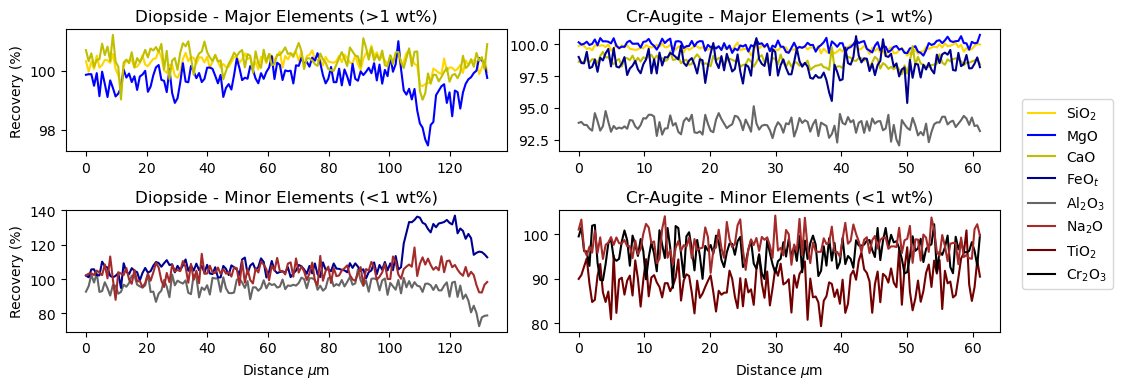

In [5]:
El = {'SiO2': 'gold', 'Al2O3': (0.4,0.4,0.4), 'FeO': (0,0,0.56), 'MgO': (0,0,1), 'CaO': 'y', 'Na2O': 'brown', 'K2O': 'red', 'TiO2': (0.45,0,0), 'Cr2O3': 'k'}
handles_labels = {}

f, a = plt.subplots(2,2, figsize = (12, 4))
a[0][0].set_title('Diopside - Major Elements (>1 wt%)')
l1 = a[0][0].plot(Diop['Distance'], Diop_recovery['SiO2'], '-', color = El['SiO2'], label = 'SiO$_2$')
l2 = a[0][0].plot(Diop['Distance'], Diop_recovery['MgO'], '-', color = El['MgO'], label = 'MgO')
l3 = a[0][0].plot(Diop['Distance'], Diop_recovery['CaO'], '-', color = El['CaO'], label = 'CaO')
handles_labels.update({l.get_label(): l for l in l1 + l2 + l3})
a[0][0].set_ylabel('Recovery (%)')

a[0][1].set_title('Cr-Augite - Major Elements (>1 wt%)')
a[0][1].plot(Aug['Distance'], Aug_recovery['SiO2'], '-', color = El['SiO2'])
a[0][1].plot(Aug['Distance'], Aug_recovery['MgO'], '-', color = El['MgO'])
a[0][1].plot(Aug['Distance'], Aug_recovery['CaO'], '-', color = El['CaO'])
l4 = a[0][1].plot(Aug['Distance'], Aug_recovery['FeO'], '-', color = El['FeO'], label = 'FeO$_t$')
l5 = a[0][1].plot(Aug['Distance'], Aug_recovery['Al2O3'], '-', color = El['Al2O3'], label = 'Al$_2$O$_3$')
handles_labels.update({l.get_label(): l for l in l4 + l5})

a[1][0].set_title('Diopside - Minor Elements (<1 wt%)')
a[1][0].plot(Diop['Distance'], Diop_recovery['Al2O3'], '-', color = El['Al2O3'])
a[1][0].plot(Diop['Distance'], Diop_recovery['FeO'], '-', color = El['FeO'])
l6 = a[1][0].plot(Diop['Distance'], Diop_recovery['Na2O'], '-', color = El['Na2O'], label = 'Na$_2$O')
handles_labels.update({l.get_label(): l for l in l6})
a[1][0].set_xlabel('Distance $\mu$m')
a[1][0].set_ylabel('Recovery (%)')

a[1][1].set_title('Cr-Augite - Minor Elements (<1 wt%)')
l7 = a[1][1].plot(Aug['Distance'], Aug_recovery['TiO2'], '-', color = El['TiO2'], label = 'TiO$_2$')
l8 = a[1][1].plot(Aug['Distance'], Aug_recovery['Cr2O3'], '-', color = El['Cr2O3'], label = 'Cr$_2$O$_3$')
a[1][1].plot(Aug['Distance'], Aug_recovery['Na2O'], '-', color = El['Na2O'])
handles_labels.update({l.get_label(): l for l in l7 + l8})
a[1][1].set_xlabel('Distance $\mu$m')

f.legend(handles_labels.values(), handles_labels.keys(),
           loc='center left', bbox_to_anchor=(0.85, 0.5))
f.tight_layout(rect=[0, 0, 0.85, 1])
